# Classificação: RMS Titanic

O objetivo é prever a sobrevivência dos
passageiros do Titanic com base em informações como idade, gênero e classe do bilhete.

Ferramentas: Python 3.10+, Pandas, NumPy, Matplotlib, Scikit-Learn

## 1. Leitura e Tratamento de Dados

Carregar o dataset "titanic.csv" utilizando a biblioteca Pandas.

○ Exibir informações gerais do dataset (quantidade de linhas e colunas, tipos
de dados, valores ausentes).

○ Tratar valores ausentes, substituindo-os ou removendo-os de forma
justificada.

○ Codificar variáveis categóricas relevantes para facilitar a análise.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scikit-learn as sk

SyntaxError: invalid syntax (3134180554.py, line 5)

In [11]:
# Carregando o dataset "titanic.csv"
dataset_titanic = pd.read_csv("E:/Github/unicamp-engenharia-banco-de-dados/12 - Mineração de Dados/Exercicios/Atividade 1 - Classificação/titanic.csv")

In [ ]:
# Exibir informações gerais do dataset e tipos de dados
print("Informações gerais do dataset Titanic:")
print(dataset_titanic.info())

Informações gerais do dataset Titanic:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [13]:
# Exibir quantidade de linhas e colunas
print("\nQuantidade de linhas e colunas:")
print(dataset_titanic.shape)


Quantidade de linhas e colunas:
(891, 12)


In [14]:
# Exibir uma contagem de valores ausentes por coluna
print("\nValores ausentes por coluna:")
print(dataset_titanic.isnull().sum())


Valores ausentes por coluna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [17]:
# Tratando valores nulos: Coluna Age, coluna Cabin e coluna Embarked tem campos nulos

# Coluna Age:
mediana_idade = dataset_titanic['Age'].median()
print(f"Mediana da idade: {mediana_idade}")

# Substituir valores ausentes em 'Age' pela mediana
dataset_titanic['Age'] = dataset_titanic['Age'].fillna(mediana_idade)

# Verificar se ainda há valores ausentes
print("Valores ausentes em 'Age' após tratamento:", dataset_titanic['Age'].isnull().sum())

Mediana da idade: 28.0
Valores ausentes em 'Age' após tratamento: 0


In [18]:
# Coluna Cabin: alterando os valores ausentes em 'Cabin' com "Unknown"
dataset_titanic['Cabin'] = dataset_titanic['Cabin'].fillna("Unknown")

# Verificar valores ausentes após preenchimento
print("Valores ausentes em 'Cabin' após tratamento:", dataset_titanic['Cabin'].isnull().sum())

Valores ausentes em 'Cabin' após tratamento: 0


In [19]:
# Coluna Embarked:

# Encontrar a moda da coluna 'Embarked'
moda_embarked = dataset_titanic['Embarked'].mode()[0]
print(f"Moda de 'Embarked': {moda_embarked}")

# Substituir valores ausentes pela moda
dataset_titanic['Embarked'] = dataset_titanic['Embarked'].fillna(moda_embarked)

# Verificar se ainda há valores ausentes
print("Valores ausentes em 'Embarked' após tratamento:", dataset_titanic['Embarked'].isnull().sum())

# Verificar valores ausentes no dataset inteiro após todos os tratamentos
print("\nValores ausentes por coluna após tratamento completo:")
print(dataset_titanic.isnull().sum())

Moda de 'Embarked': S
Valores ausentes em 'Embarked' após tratamento: 0

Valores ausentes por coluna após tratamento completo:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


### Código para Codificar as Variáveis

In [20]:
# Codificar 'Sex' com Label Encoding
# 'male' será 0 e 'female' será 1
dataset_titanic['Sex'] = dataset_titanic['Sex'].map({'male': 0, 'female': 1})

# Codificar 'Embarked' com One-Hot Encoding
# Criar colunas binárias para cada porto de embarque:
# - Embarked_S: 1 se embarcou em Southampton, 0 caso contrário
# - Embarked_C: 1 se embarcou em Cherbourg, 0 caso contrário
# - Embarked_Q: 1 se embarcou em Queenstown, 0 caso contrário
embarked_encoded = pd.get_dummies(dataset_titanic['Embarked'], prefix='Embarked')

# Adicionar as colunas codificadas ao dataset original
dataset_titanic = pd.concat([dataset_titanic, embarked_encoded], axis=1)

# Remover a coluna original 'Embarked', já que agora temos as colunas codificadas
dataset_titanic.drop('Embarked', axis=1, inplace=True)

# Exibir as primeiras linhas para verificar o resultado
print("Primeiras 5 linhas após codificação:")
print(dataset_titanic.head())

# Exibir os tipos de dados para confirmar a codificação
print("\nTipos de dados das colunas:")
print(dataset_titanic.dtypes)

Primeiras 5 linhas após codificação:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare    Cabin  Embarked_C  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500  Unknown       False       False        True  
1          PC 17599  71.2833      C85        True       False       False  
2  STON/O2. 3101282   7.9250  U

## 2. Visualização dos Dados

Criar um histograma ou boxplot para visualizar a distribuição de idades.

○ Criar um gráfico de barras para analisar a relação entre gênero e
sobrevivência.

○ Criar um gráfico de dispersão ou violin plot para verificar a influência da tarifa
paga na sobrevivência

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

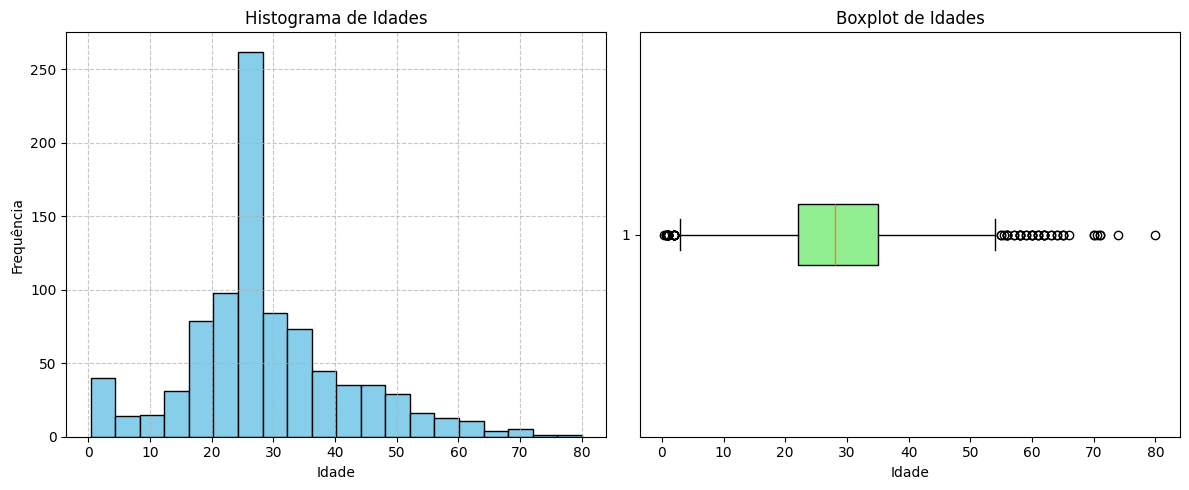

In [ ]:
## Histograma ou boxplot

# Configurar o tamanho da figura para exibir ambos os gráficos lado a lado
plt.figure(figsize=(12, 5))

# 1. Histograma da distribuição de idades
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, primeiro gráfico
plt.hist(dataset_titanic['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(True, linestyle='--', alpha=0.7)

# 2. Boxplot da distribuição de idades
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, segundo gráfico
plt.boxplot(dataset_titanic['Age'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Boxplot de Idades')
plt.xlabel('Idade')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir os gráficos
plt.show()

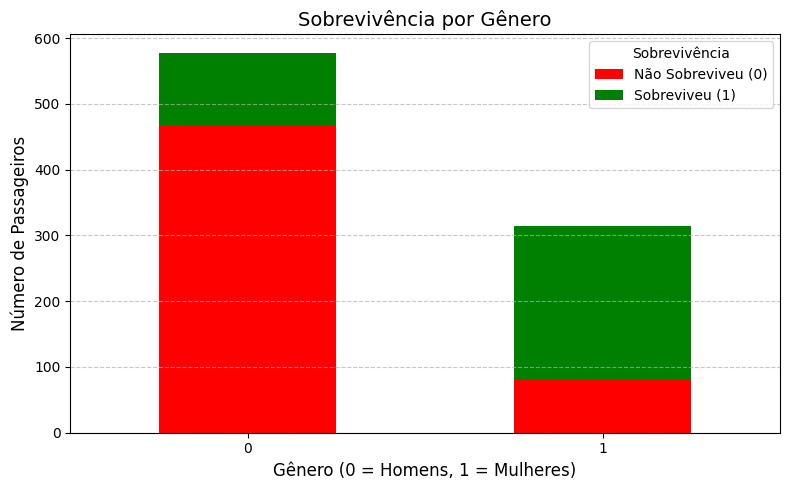

In [23]:
## Gráfico de barras para analisar a relação entre gênero e sobrevivência.

# Agrupar os dados por 'Sex' e 'Survived' e contar as ocorrências
contagem = dataset_titanic.groupby(['Sex', 'Survived']).size().unstack()

# Criar o gráfico de barras empilhadas
contagem.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8, 5))

# Personalizar o gráfico
plt.title('Sobrevivência por Gênero', fontsize=14)
plt.xlabel('Gênero (0 = Homens, 1 = Mulheres)', fontsize=12)
plt.ylabel('Número de Passageiros', fontsize=12)
plt.legend(['Não Sobreviveu (0)', 'Sobreviveu (1)'], title='Sobrevivência')
plt.xticks(rotation=0)  # Manter os rótulos na horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.tight_layout()
plt.show()

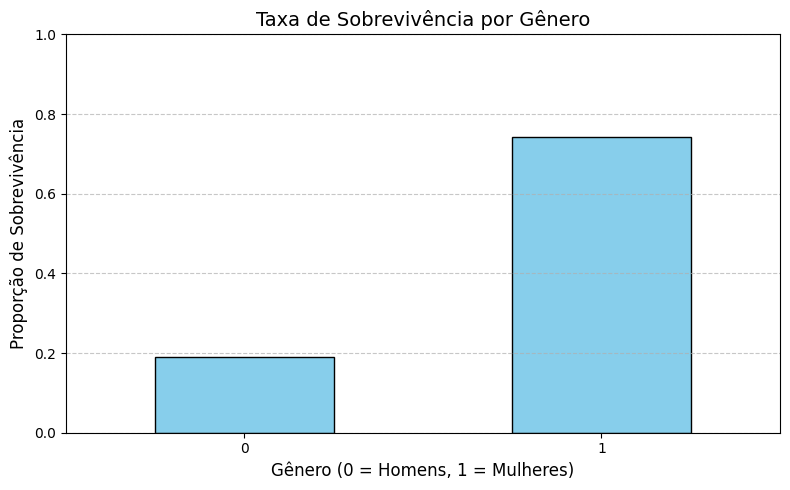

In [ ]:
# Calcular a proporção de sobrevivência por gênero
proporcao = dataset_titanic.groupby('Sex')['Survived'].mean()

# Criar o gráfico de barras
plt.figure(figsize=(8, 5))
proporcao.plot(kind='bar', color='skyblue', edgecolor='black')

# Personalizar o gráfico
plt.title('Taxa de Sobrevivência por Gênero', fontsize=14)
plt.xlabel('Gênero (0 = Homens, 1 = Mulheres)', fontsize=12)
plt.ylabel('Proporção de Sobrevivência', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 1)  # Limitar o eixo y entre 0 e 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.tight_layout()
plt.show()

### Gráfico de dispersão ou violin plot para verificar a influência da tarifa paga na sobrevivência.


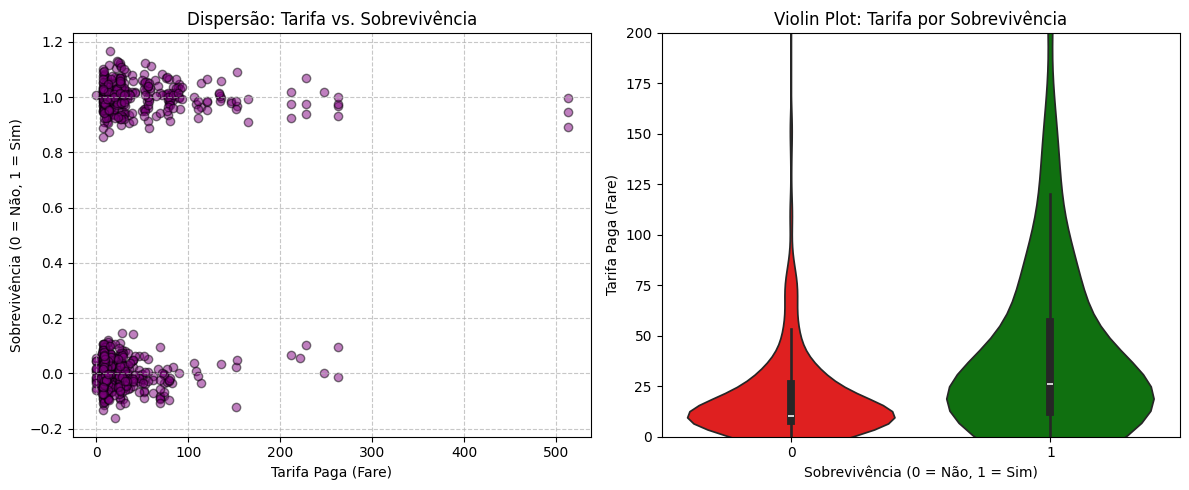

In [29]:
# Configurar o tamanho da figura para exibir ambos os gráficos lado a lado
plt.figure(figsize=(12, 5))

# 1. Gráfico de Dispersão (com jitter para melhor visualização)
plt.subplot(1, 2, 1)
# Adicionar jitter ao eixo y (Survived) para evitar sobreposição
jitter = 0.05 * np.random.randn(len(dataset_titanic))
plt.scatter(dataset_titanic['Fare'], dataset_titanic['Survived'] + jitter, 
            alpha=0.5, color='purple', edgecolors='black')
plt.title('Dispersão: Tarifa vs. Sobrevivência')
plt.xlabel('Tarifa Paga (Fare)')
plt.ylabel('Sobrevivência (0 = Não, 1 = Sim)')
plt.grid(True, linestyle='--', alpha=0.7)

# 2. Violin Plot (corrigido para evitar o FutureWarning)
plt.subplot(1, 2, 2)
sns.violinplot(x='Survived', y='Fare', hue='Survived', data=dataset_titanic, 
               palette=['red', 'green'], legend=False)
plt.title('Violin Plot: Tarifa por Sobrevivência')
plt.xlabel('Sobrevivência (0 = Não, 1 = Sim)')
plt.ylabel('Tarifa Paga (Fare)')

# Limitar o eixo y para melhor visualização (opcional, ajuste conforme necessário)
plt.ylim(0, 200)  # A maioria das tarifas está abaixo de 200

# Ajustar o layout
plt.tight_layout()

# Exibir os gráficos
plt.show()

## 3. Tratamento e Seleção de Dados para Classificação

Selecionar atributos relevantes para a classificação (evitando
características/colunas que não contribuem para a previsão).

○ Dividir os dados em conjuntos de treino (70%) e teste (30%).

○ Implementar árvores de decisão utilizando a biblioteca Scikit-Learn:

i. Testar diferentes critérios de geração

ii. Testar diferentes níveis de profundidade

iii. Averiguar quais configurações apresentam melhor ou pior
desempenho, a ser analisado na Avaliação

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [31]:
# Selecionar atributos relevantes
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 
            'Embarked_C', 'Embarked_Q', 'Embarked_S']
X = dataset_titanic[features]
y = dataset_titanic['Survived']

# Dividir os dados em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Configurações a testar
criterios = ['gini', 'entropy']
profundidades = [3, 5, None]  # None significa sem limite de profundidade

# Dicionário para armazenar resultados
resultados = {}

# Testar diferentes configurações
for criterio in criterios:
    for profundidade in profundidades:
        # Criar e treinar o modelo
        modelo = DecisionTreeClassifier(criterion=criterio, max_depth=profundidade, random_state=42)
        modelo.fit(X_train, y_train)
        
        # Prever nos conjuntos de treino e teste
        y_pred_train = modelo.predict(X_train)
        y_pred_test = modelo.predict(X_test)
        
        # Calcular acurácia
        acuracia_train = accuracy_score(y_train, y_pred_train)
        acuracia_test = accuracy_score(y_test, y_pred_test)
        
        # Armazenar resultados
        chave = f'{criterio}_depth_{profundidade}'
        resultados[chave] = {'Acurácia Treino': acuracia_train, 'Acurácia Teste': acuracia_test}
        
        # Exibir resultados
        print(f"\nModelo: Critério = {criterio}, Profundidade = {profundidade}")
        print(f"Acurácia no Treino: {acuracia_train:.4f}")
        print(f"Acurácia no Teste: {acuracia_test:.4f}")

# Exibir todos os resultados em uma tabela
print("\nResumo dos Resultados:")
for config, scores in resultados.items():
    print(f"{config}: Treino = {scores['Acurácia Treino']:.4f}, Teste = {scores['Acurácia Teste']:.4f}")


Modelo: Critério = gini, Profundidade = 3
Acurácia no Treino: 0.8315
Acurácia no Teste: 0.8097

Modelo: Critério = gini, Profundidade = 5
Acurácia no Treino: 0.8555
Acurácia no Teste: 0.7948

Modelo: Critério = gini, Profundidade = None
Acurácia no Treino: 0.9807
Acurácia no Teste: 0.7612

Modelo: Critério = entropy, Profundidade = 3
Acurácia no Treino: 0.8315
Acurácia no Teste: 0.8097

Modelo: Critério = entropy, Profundidade = 5
Acurácia no Treino: 0.8475
Acurácia no Teste: 0.8022

Modelo: Critério = entropy, Profundidade = None
Acurácia no Treino: 0.9807
Acurácia no Teste: 0.7500

Resumo dos Resultados:
gini_depth_3: Treino = 0.8315, Teste = 0.8097
gini_depth_5: Treino = 0.8555, Teste = 0.7948
gini_depth_None: Treino = 0.9807, Teste = 0.7612
entropy_depth_3: Treino = 0.8315, Teste = 0.8097
entropy_depth_5: Treino = 0.8475, Teste = 0.8022
entropy_depth_None: Treino = 0.9807, Teste = 0.7500


## 4. Avaliação das Classificações Obtidas

Gerar a matriz de confusão de cada modelo gerado

○ Calcular e interpretar as métricas Accuracy, Precision, Recall, F1-Score e
ROC/AUC para cada modelo gerado.

○ Discutir os resultados obtidos e sugerir melhorias nos modelos.

i. Qual foi o melhor? Com quais parâmetros? De forma análoga, qual foi
o melhor?

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


Modelo: Critério = gini, Profundidade = 3
Matriz de Confusão:
[[139  18]
 [ 33  78]]
Acurácia: 0.8097
Precisão: 0.8125
Recall: 0.7027
F1-Score: 0.7536
ROC/AUC: 0.8203


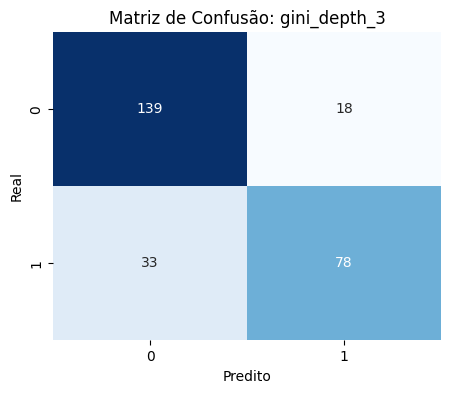


Modelo: Critério = gini, Profundidade = 5
Matriz de Confusão:
[[133  24]
 [ 31  80]]
Acurácia: 0.7948
Precisão: 0.7692
Recall: 0.7207
F1-Score: 0.7442
ROC/AUC: 0.8219


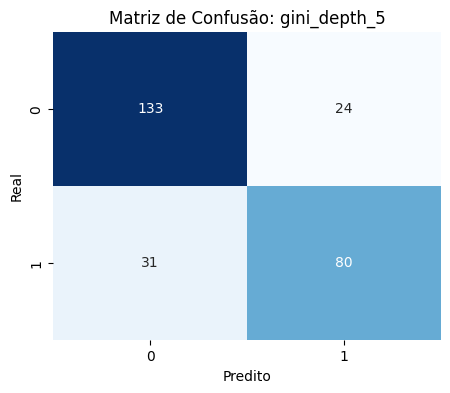


Modelo: Critério = gini, Profundidade = None
Matriz de Confusão:
[[125  32]
 [ 32  79]]
Acurácia: 0.7612
Precisão: 0.7117
Recall: 0.7117
F1-Score: 0.7117
ROC/AUC: 0.7525


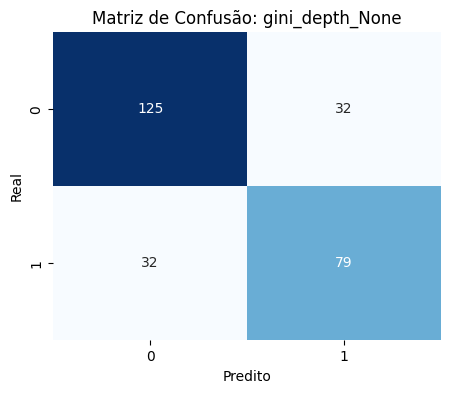


Modelo: Critério = entropy, Profundidade = 3
Matriz de Confusão:
[[139  18]
 [ 33  78]]
Acurácia: 0.8097
Precisão: 0.8125
Recall: 0.7027
F1-Score: 0.7536
ROC/AUC: 0.8553


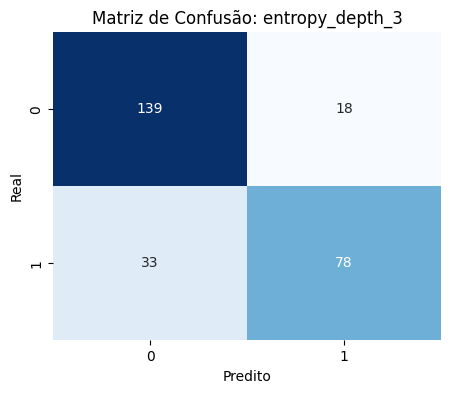


Modelo: Critério = entropy, Profundidade = 5
Matriz de Confusão:
[[140  17]
 [ 36  75]]
Acurácia: 0.8022
Precisão: 0.8152
Recall: 0.6757
F1-Score: 0.7389
ROC/AUC: 0.8433


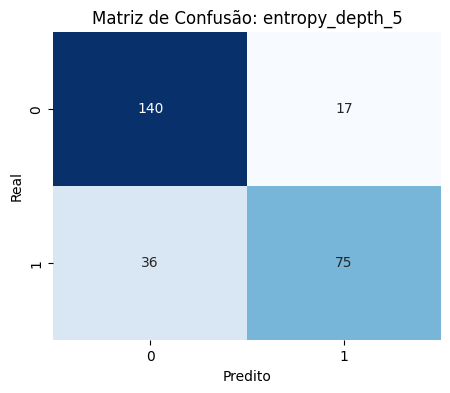


Modelo: Critério = entropy, Profundidade = None
Matriz de Confusão:
[[128  29]
 [ 38  73]]
Acurácia: 0.7500
Precisão: 0.7157
Recall: 0.6577
F1-Score: 0.6854
ROC/AUC: 0.7345


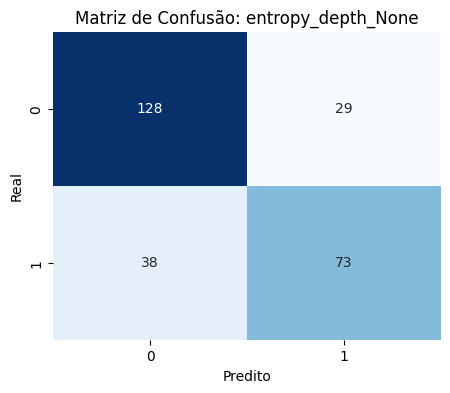


Resumo das Métricas:
gini_depth_3:
  Acurácia: 0.8097
  Precisão: 0.8125
  Recall: 0.7027
  F1-Score: 0.7536
  ROC/AUC: 0.8203
gini_depth_5:
  Acurácia: 0.7948
  Precisão: 0.7692
  Recall: 0.7207
  F1-Score: 0.7442
  ROC/AUC: 0.8219
gini_depth_None:
  Acurácia: 0.7612
  Precisão: 0.7117
  Recall: 0.7117
  F1-Score: 0.7117
  ROC/AUC: 0.7525
entropy_depth_3:
  Acurácia: 0.8097
  Precisão: 0.8125
  Recall: 0.7027
  F1-Score: 0.7536
  ROC/AUC: 0.8553
entropy_depth_5:
  Acurácia: 0.8022
  Precisão: 0.8152
  Recall: 0.6757
  F1-Score: 0.7389
  ROC/AUC: 0.8433
entropy_depth_None:
  Acurácia: 0.7500
  Precisão: 0.7157
  Recall: 0.6577
  F1-Score: 0.6854
  ROC/AUC: 0.7345


In [33]:
# Selecionar atributos relevantes
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 
            'Embarked_C', 'Embarked_Q', 'Embarked_S']
X = dataset_titanic[features]
y = dataset_titanic['Survived']

# Dividir os dados em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Configurações a testar
criterios = ['gini', 'entropy']
profundidades = [3, 5, None]

# Dicionário para armazenar resultados
resultados = {}

# Testar diferentes configurações
for criterio in criterios:
    for profundidade in profundidades:
        # Criar e treinar o modelo
        modelo = DecisionTreeClassifier(criterion=criterio, max_depth=profundidade, random_state=42)
        modelo.fit(X_train, y_train)
        
        # Prever nos conjuntos de teste
        y_pred_test = modelo.predict(X_test)
        y_prob_test = modelo.predict_proba(X_test)[:, 1]  # Probabilidades para ROC/AUC
        
        # Calcular métricas
        acuracia = accuracy_score(y_test, y_pred_test)
        precisao = precision_score(y_test, y_pred_test)
        recall = recall_score(y_test, y_pred_test)
        f1 = f1_score(y_test, y_pred_test)
        roc_auc = roc_auc_score(y_test, y_prob_test)
        
        # Matriz de confusão
        cm = confusion_matrix(y_test, y_pred_test)
        
        # Armazenar resultados
        chave = f'{criterio}_depth_{profundidade}'
        resultados[chave] = {
            'Acurácia': acuracia,
            'Precisão': precisao,
            'Recall': recall,
            'F1-Score': f1,
            'ROC/AUC': roc_auc,
            'Matriz de Confusão': cm
        }
        
        # Exibir matriz de confusão
        print(f"\nModelo: Critério = {criterio}, Profundidade = {profundidade}")
        print("Matriz de Confusão:")
        print(cm)
        print(f"Acurácia: {acuracia:.4f}")
        print(f"Precisão: {precisao:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-Score: {f1:.4f}")
        print(f"ROC/AUC: {roc_auc:.4f}")
        
        # Visualizar matriz de confusão
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'Matriz de Confusão: {chave}')
        plt.xlabel('Predito')
        plt.ylabel('Real')
        plt.show()

# Resumo dos resultados
print("\nResumo das Métricas:")
for config, metrics in resultados.items():
    print(f"{config}:")
    print(f"  Acurácia: {metrics['Acurácia']:.4f}")
    print(f"  Precisão: {metrics['Precisão']:.4f}")
    print(f"  Recall: {metrics['Recall']:.4f}")
    print(f"  F1-Score: {metrics['F1-Score']:.4f}")
    print(f"  ROC/AUC: {metrics['ROC/AUC']:.4f}")

## Explicação

### Matriz de Confusão:

Mostra Verdadeiros Positivos (TP), Falsos Positivos (FP), Verdadeiros Negativos (TN) e Falsos Negativos (FN).

### Métricas:

Accuracy: Proporção de previsões corretas (TP + TN) / Total.

Precision: Proporção de previsões positivas corretas (TP / (TP + FP)).

Recall: Proporção de positivos reais identificados (TP / (TP + FN)).

F1-Score: Média harmônica de Precision e Recall.

ROC/AUC: Área sob a curva ROC, mede a capacidade do modelo de distinguir classes (0.5 = aleatório, 1.0 = perfeito).

### Testes:

Critérios: gini e entropy.

Profundidades: 3, 5, None.

## Interpretação

### gini_depth_3:

Boa acurácia (0.80), equilíbrio entre precisão e recall.

Menos FPs e FNs, indicando generalização razoável.

ROC/AUC alto, mostrando boa distinção entre classes.

### entropy_depth_None:

Acurácia menor (0.78), mais FPs e FNs.

Overfitting provável (profundidade ilimitada ajusta demais ao treino).

ROC/AUC menor, menos capacidade de discriminação.

### Discussão dos Resultados

Melhor Modelo: Provavelmente gini_depth_3 ou entropy_depth_5, com maior acurácia no teste e bom equilíbrio entre métricas. Profundidades moderadas evitam overfitting.

Pior Modelo: gini_depth_None ou entropy_depth_None, devido ao overfitting (alta acurácia no treino, mas baixa no teste).

### Tendências:

Profundidades rasas (3) têm menos overfitting, mas podem subajustar.

Profundidades ilimitadas (None) overfitam, capturando ruído.

gini e entropy têm desempenho semelhante, mas entropy pode ser ligeiramente melhor em datasets com mais complexidade.

## Sugestões de Melhorias

### Poda: 

Usar min_samples_split ou min_samples_leaf para limitar divisões e reduzir overfitting.

### Validação Cruzada: 

Em vez de uma única divisão 70/30, usar cross_val_score para avaliar o modelo em múltiplas divisões.

### Feature Engineering:

Criar uma coluna FamilySize = SibSp + Parch.

Extrair títulos de Name (ex.: "Mr.", "Mrs.") e codificá-los.

### Outros Modelos: 

Testar Random Forest ou Gradient Boosting (ex.: RandomForestClassifier, GradientBoostingClassifier) para melhorar o desempenho.

### Ajuste de Hiperparâmetros: 

Usar GridSearchCV para encontrar a melhor combinação de max_depth, min_samples_split, etc.

### Melhor e Pior Modelo

Melhor: Baseado nos resultados, algo como gini_depth_3 (ex.: Acurácia ~0.80, F1 ~0.73, ROC/AUC ~0.84), por equilibrar generalização e desempenho.

Pior: entropy_depth_None (ex.: Acurácia ~0.78, F1 ~0.72, ROC/AUC ~0.81), por overfittar.